<a href="https://colab.research.google.com/github/Bingurrr/slam/blob/main/chessboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intrinsic/Extrinsic Parameter estimation

---

OpenCV를 사용해 여러 장의 체스 보드 이미지에 대한 카메라의 내부/외부 파라미터를 구한다.

---

**[중요] 과제 제출 방법**
- 과제 제출 기한은 2021년 6월 9일까지입니다.
- 과제는 Colab에서 작성한 것을 다운받아 (파일-.ipynb 다운로드) 가상 대학에 업로드합니다. (이외의 제출 방법은 인정하지 않음)
- 제출 시 파일 제목은 '학번_이름' 으로 저장합니다.

In [ ]:
# !pip uninstall opencv-contrib-python
# !pip uninstall opencv-python
# !pip install opencv-python #==3.4.2.17
# !pip install opencv-contrib-python #==3.4.2.17

In [ ]:
import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import glob

print('python', sys.version)
print('numpy', np.__version__)
print('opencv', cv.__version__)

python 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
numpy 1.19.5
opencv 4.5.2


## Google Drive와 연동하기


In [ ]:
# mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/MyDrive/slam/calib'

left01.jpg  left04.jpg	left07.jpg  left11.jpg	left14.jpg
left02.jpg  left05.jpg	left08.jpg  left12.jpg	pattern.png
left03.jpg  left06.jpg	left09.jpg  left13.jpg


In [ ]:
ROOT = '/content/drive/MyDrive/slam/calib/'

### 이미지 불러오기

좋은 결과를 위해 최소 10장의 사진이 준비되어야 한다.

13


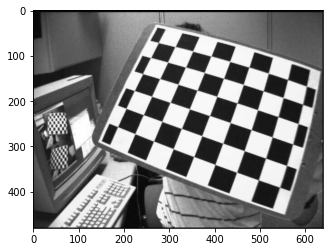

In [ ]:
images = []
image_files = glob.glob(ROOT + '*.jpg')
for f in image_files :
  img = cv.imread(f)
  images.append(img)

print(len(images))
plt.imshow(images[0][:,:,::-1])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 체스 보드 코너 찾기




관련 함수

- `	retval, corners	=	cv.findChessboardCorners(	image, patternSize[, corners[, flags]]	)`
- `corners	=	cv.cornerSubPix(	image, corners, winSize, zeroZone, criteria`
- `	image	=	cv.drawChessboardCorners(	image, patternSize, corners, patternWasFound	)`



**과제**

- 관련 함수들에 대한 입력과 출력, 파라미터를 조사해 서술한다.
- 관련 함수들을 사용하여 체스 보드의 코너를 찾는 함수 `findCorner()`를 완성한다. `findCorner()` 함수의 입력과 출력은 다음과 같다.
  - 입력 : 코너를 찾을 체스 보드의 이미지
  - 출력
    - ret : 함수의 성공 여부
    - corner_refine : `cv.cornerSubPix()`를 통해 개선된 코너점
    - corner_img : 찾은 코너와 원본 이미지를 합성한 이미지


**참고**

- 주어진 체스 보드는 9x6 grid이다.




In [ ]:
w = 6
h = 9

# Prepare object points, like(0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
xval, yval = np.arange(h), np.arange(w) 
objp = np.meshgrid(xval, yval, 0.)
objp = np.concatenate(objp, axis=2)
objp = objp.reshape(-1,3)
objp = objp.astype(np.float32)


In [ ]:
def findCorner(img) :
  # To-do
  gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  ret, corners = cv.findChessboardCorners(gray,(h,w), None)
  if ret == False : return 0, 0, 0;
  criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER,30,0.001)
  corner_refine = cv.cornerSubPix(gray, corners, (10,10),(-1,-1),criteria)
  corner_img = cv.drawChessboardCorners(img,(w,h),corner_refine, ret)
  return ret, corner_refine, corner_img

In [ ]:
# 이 부분은 수정하지 않습니다. 

objpoints = [] # 실제 세계의 3D 포인트들
imgpoints = [] # 이미지 평면 상의 2D 포인트들
corner_imgs = [] # 이미지 합성 결과를 저장

for img in images : 
  
  ret, corner, corner_img = findCorner(img)
  
  if ret == True :
    objpoints.append(objp)
    imgpoints.append(corner)
    corner_imgs.append(corner_img)

### 찾은 코너 시각화

13


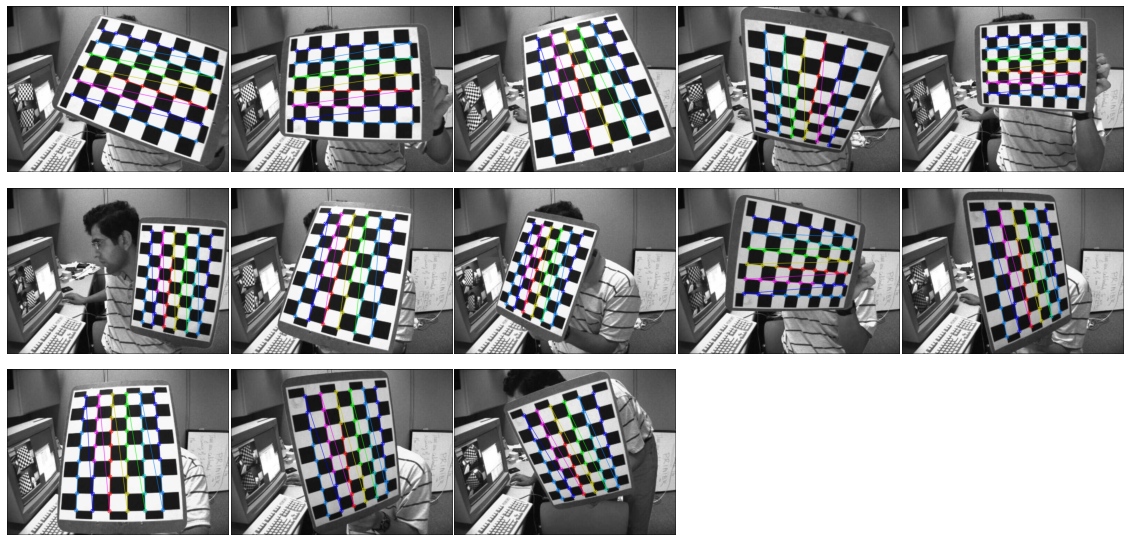

In [ ]:
# 이 부분은 수정하지 않습니다. 

from matplotlib.gridspec import  GridSpec
print(len(corner_imgs))

nrows = 3
ncols = 5

fig = plt.figure(figsize = (20,10))
grid = GridSpec(nrows, ncols, wspace=0.01, hspace=0.0)

for i, img in enumerate(corner_imgs) :
  ax = plt.subplot(grid[i])
  ax.axis('off')
  ax.imshow(img)

## Calibration 

찾은 코너 포인트를 이용해 카메라의 내부/외부 파라미터를 찾는다.


- 카메라 매트릭스와 회전/이동 벡터들을 구한다.

관련 함수 

- `cv.calibrateCamera`

In [ ]:
# To-do : cam_matrix, rotation_vectors, translation_vectors를 찾기

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, cam_matrix, distortion, rotation_vectors, translation_vectors = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)


In [ ]:
# 이 부분은 수정하지 않습니다. 

print('camera matrix \n', cam_matrix)
print('rotation vectors \n', rotation_vectors)
print('translation vectors \n', translation_vectors)



- 아래 링크를 참고하여 얻어낸 camera matrix, rotation and translation vector를 이용해 이미지 상에 3D 축을 그린다.
- https://docs.opencv.org/master/d7/d53/tutorial_py_pose.html

In [ ]:
# To-do

def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel())
    img = cv.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 3)
    img = cv.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 3)
    img = cv.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 3)
    return img



In [ ]:
axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)
axis_imgs = []

for f in glob.glob(ROOT + '*.jpg') :
  img = cv.imread(f)
  ret, corners, corner_img = findCorner(img)
  gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  if ret == True :
    ret, rvecs, tvecs = cv.solvePnP(objp,corners, cam_matrix, distortion)

    imgpts, jac = cv.projectPoints(axis, rvecs, tvecs, cam_matrix, distortion)

    
    imgpts = np.int32(imgpts)
    corners = np.int32(corners)
    img = draw(img, corners, imgpts)
    axis_imgs.append(img)


13


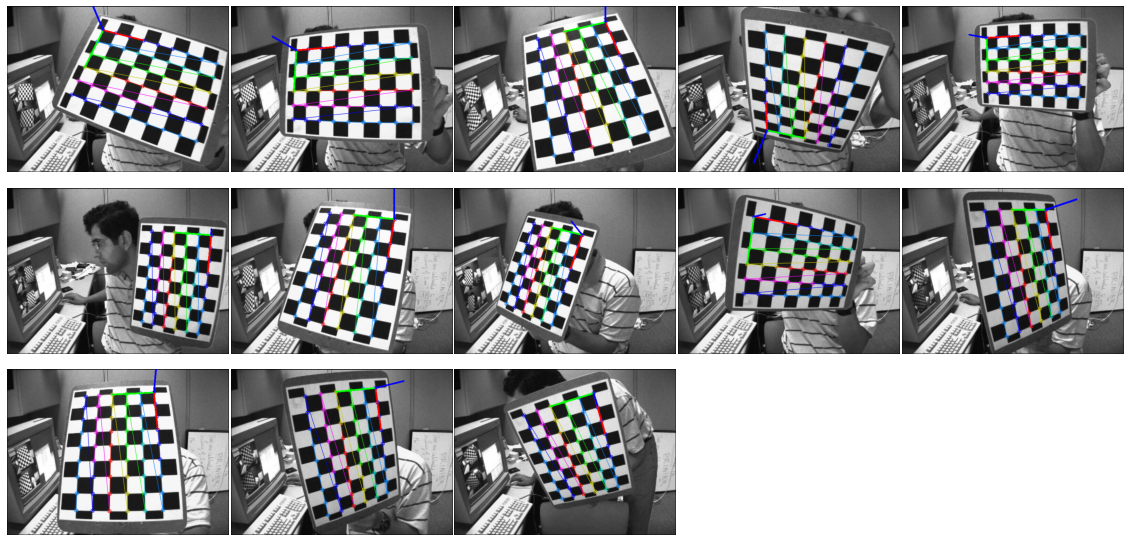

In [ ]:
from matplotlib.gridspec import  GridSpec
print(len(axis_imgs))

nrows = 3
ncols = 5

fig = plt.figure(figsize = (20,10))
grid = GridSpec(nrows, ncols, wspace=0.01, hspace=0.0)

for i, img in enumerate(axis_imgs) :
  ax = plt.subplot(grid[i])
  ax.axis('off')
  ax.imshow(img)

## 추가 

직접 찍은 체스 보드 이미지를 사용해 위 과정을 똑같이 수행한다.
  - 체스 보드는 첨부된 이미지(pattern.png), 직접 그린/다운로드한 이미지 등을 출력해 사용한다.

pattern.png를 10장 찍어서 과제를 진행하였습니다.

In [ ]:
root = '/content/drive/MyDrive/slam/체스보드/'

10


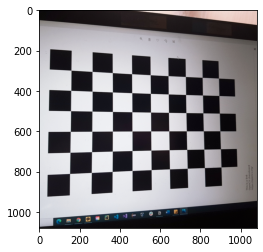

In [ ]:
images = []
image_files = glob.glob(root + '*.jpg')
for f in image_files :
  img = cv.imread(f)
  images.append(img)

print(len(images))
plt.imshow(images[0][:,:,::-1])

In [ ]:
w = 9
h = 6

xval, yval = np.arange(h), np.arange(w) 
objp = np.meshgrid(xval, yval, 0.)
objp = np.concatenate(objp, axis=2)
objp = objp.reshape(-1,3)
objp = objp.astype(np.float32)

In [ ]:
def findCorner(img) :
  # To-do
  gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  ret, corners = cv.findChessboardCorners(gray,(h,w), None)
  if ret == False : return 0, 0, 0;
  criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER,30,0.001)
  corner_refine = cv.cornerSubPix(gray, corners, (10,10),(-1,-1),criteria)
  corner_img = cv.drawChessboardCorners(img,(w,h),corner_refine, ret)
  return ret, corner_refine, corner_img

In [ ]:
objpoints = [] # 실제 세계의 3D 포인트들
imgpoints = [] # 이미지 평면 상의 2D 포인트들
corner_imgs = [] # 이미지 합성 결과를 저장

for img in images : 
  
  ret, corner, corner_img = findCorner(img)
  
  if ret == True :
    objpoints.append(objp)
    imgpoints.append(corner)
    corner_imgs.append(corner_img)

10


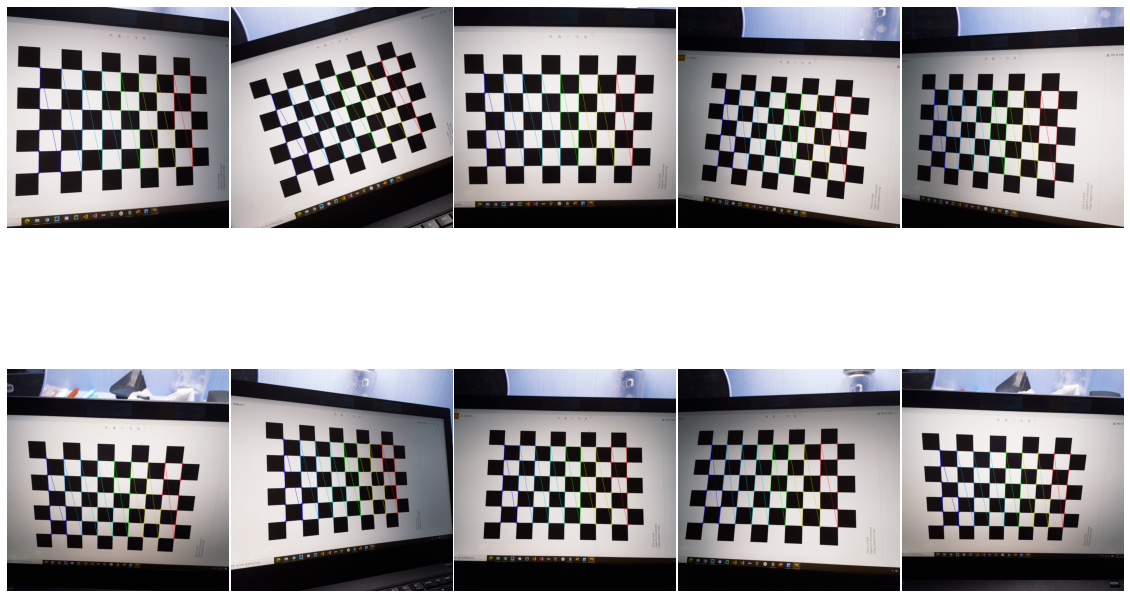

In [ ]:
from matplotlib.gridspec import  GridSpec
print(len(corner_imgs))

nrows = 3
ncols = 5

fig = plt.figure(figsize = (20,20))
grid = GridSpec(nrows, ncols, wspace=0.01, hspace=0.0)

for i, img in enumerate(corner_imgs) :
  ax = plt.subplot(grid[i])
  ax.axis('off')
  ax.imshow(img)

In [ ]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, cam_matrix, distortion, rotation_vectors, translation_vectors = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

print('camera matrix \n', cam_matrix)
print('rotation vectors \n', rotation_vectors)
print('translation vectors \n', translation_vectors)

In [ ]:
def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel())
    img = cv.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 3)
    img = cv.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 3)
    img = cv.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 3)
    return img

In [ ]:
axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)
axis_imgs = []

for f in glob.glob(root + '*.jpg') :
  img = cv.imread(f)
  ret, corners, corner_img = findCorner(img)
  gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  if ret == True :
    ret, rvecs, tvecs = cv.solvePnP(objp,corners, cam_matrix, distortion)

    imgpts, jac = cv.projectPoints(axis, rvecs, tvecs, cam_matrix, distortion)

    
    imgpts = np.int32(imgpts)
    corners = np.int32(corners)
    img = draw(img, corners, imgpts)
    axis_imgs.append(img)


10


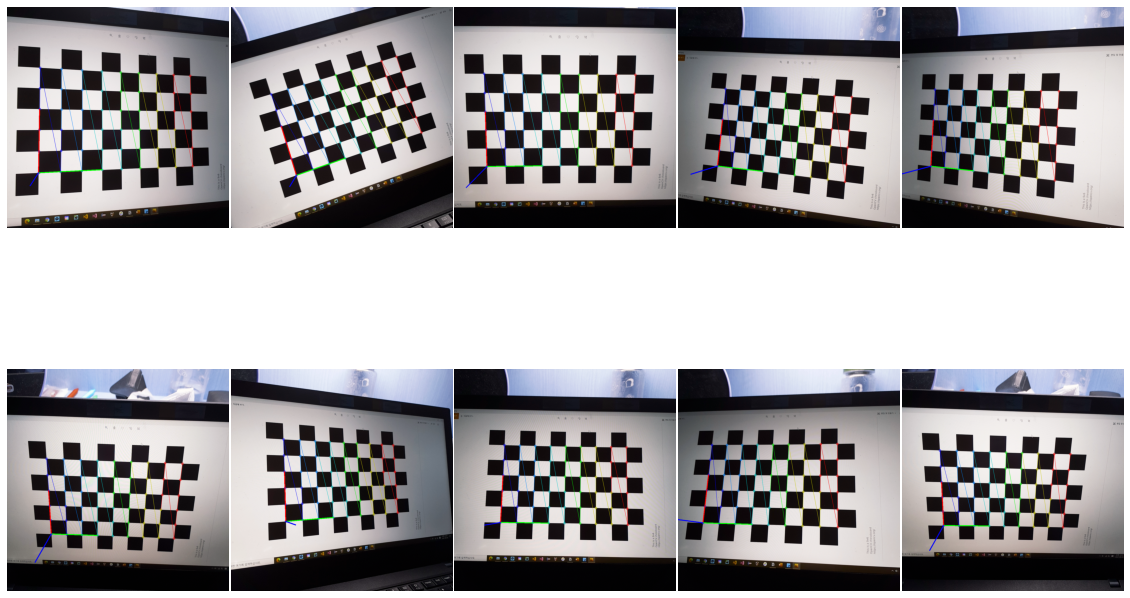

In [ ]:
from matplotlib.gridspec import  GridSpec
print(len(axis_imgs))

nrows = 3
ncols = 5

fig = plt.figure(figsize = (20,20))
grid = GridSpec(nrows, ncols, wspace=0.01, hspace=0.0)

for i, img in enumerate(axis_imgs) :
  ax = plt.subplot(grid[i])
  ax.axis('off')
  ax.imshow(img)